# Gene plots

In [ ]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import geneinfo as gi
gi.email('your@email.com')

## Plot data over gene annotation

In [16]:
# x = np.linspace(1, 1520300000, 100000)
# y = np.random.random(100000)
# dummy manhattan data
x = np.linspace(76500000, 77500000, 10000)
rng = np.random.default_rng()
y = rng.exponential(scale=1, size=x.size)

**Standard plot:**

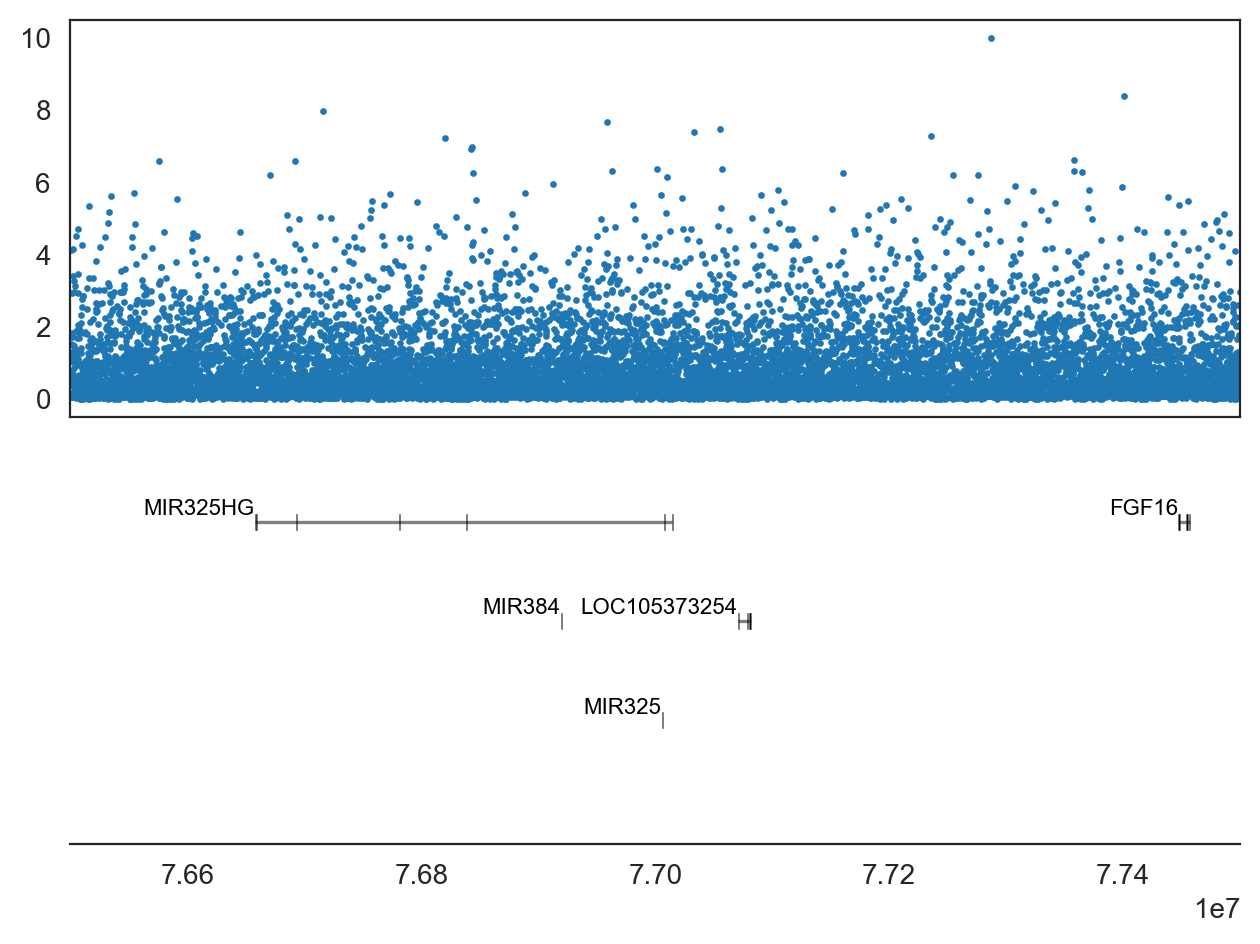

In [17]:
ax = gi.gene_plot('chrX', 76500000, 77500000, 'hg38')
ax.scatter(x, y, s=2)
plt.tight_layout()

**Same on older hg19 assembly:**

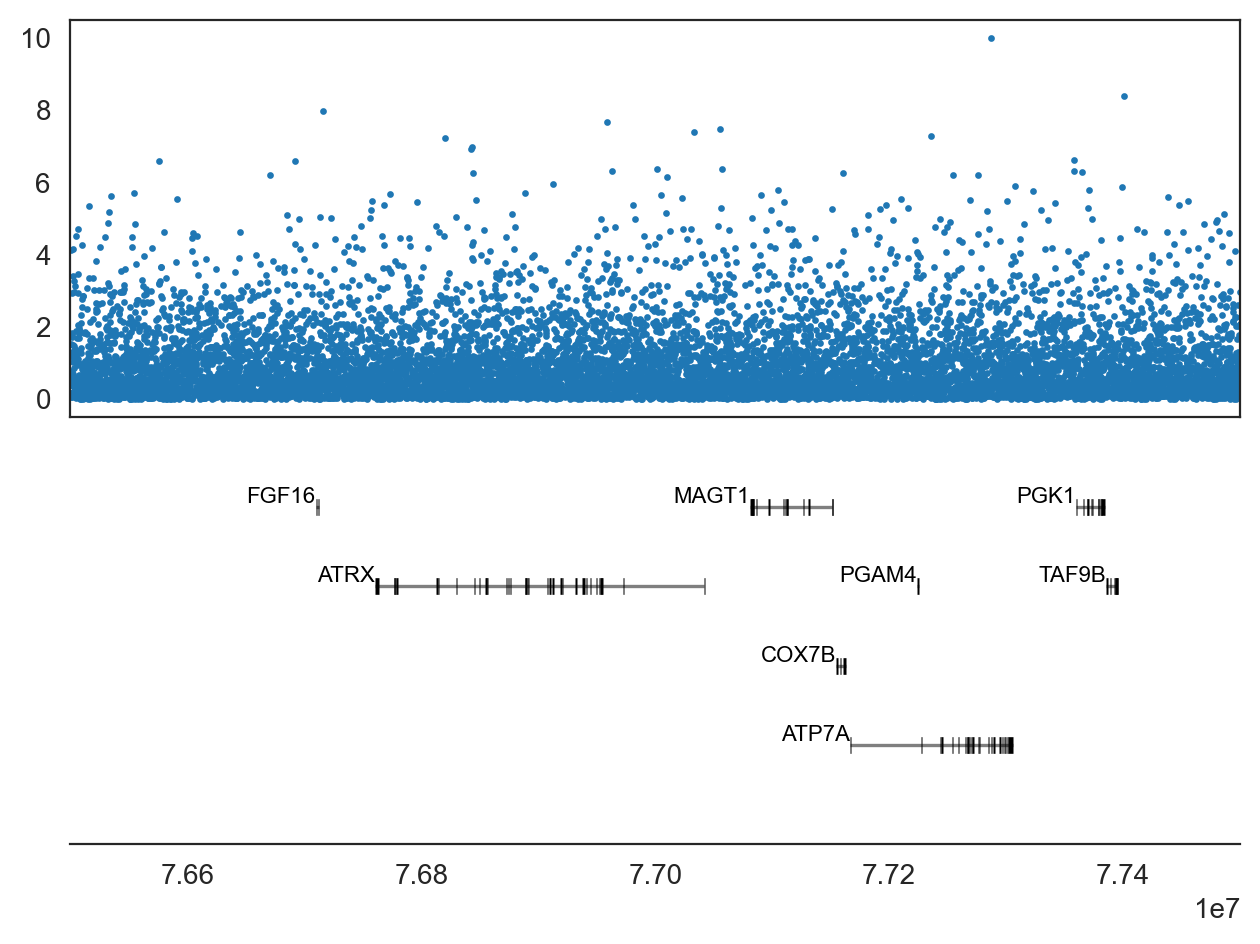

In [18]:
ax = gi.gene_plot('chrX', 76500000, 77500000, assembly='hg19')
ax.scatter(x, y, s=2)
plt.tight_layout()

**Two subplots for data:**

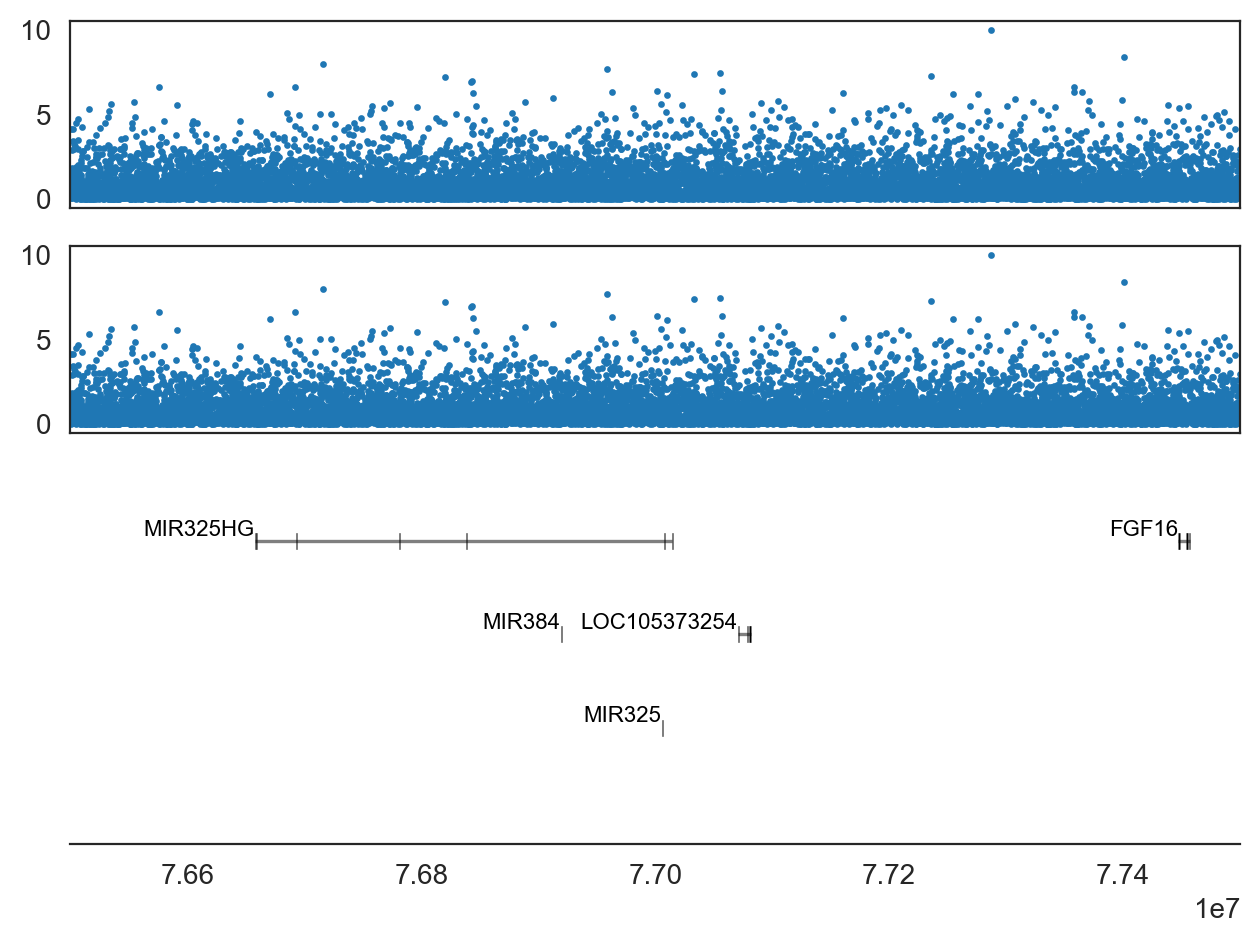

In [19]:
ax1, ax2 = gi.gene_plot('chrX', 76500000, 77500000, assembly='hg38', return_axes=2)
ax1.scatter(x, y, s=2)
ax2.scatter(x, y, s=2)
plt.tight_layout()

**Three subplots for data and adjusted aspect ratio:**

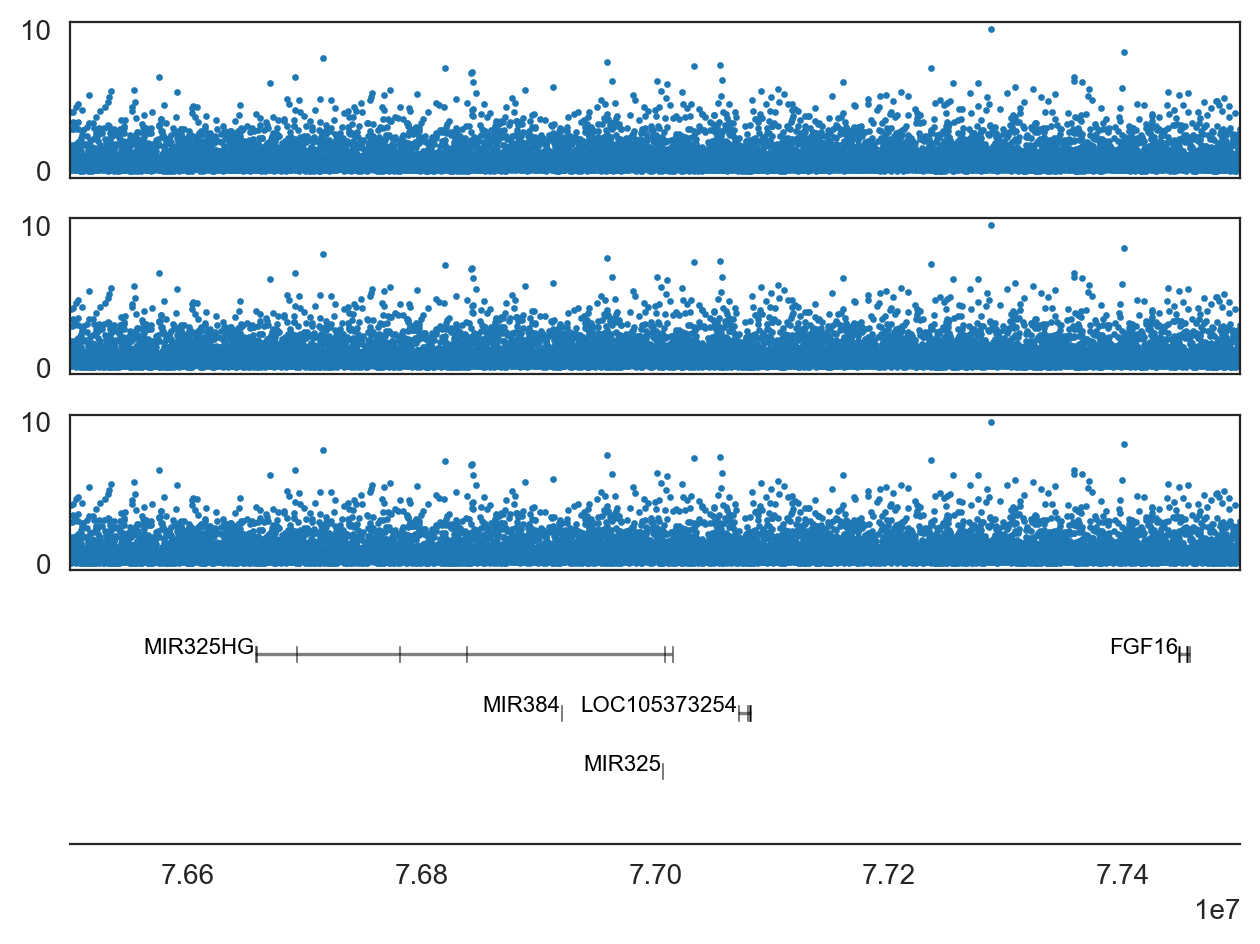

In [20]:
ax1, ax2, ax3 = gi.gene_plot('chrX', 76500000, 77500000, assembly='hg38', return_axes=3, aspect=0.5)
ax1.scatter(x, y, s=2)
ax2.scatter(x, y, s=2)
ax3.scatter(x, y, s=2)
plt.tight_layout()

**Highlight a list of genes:**

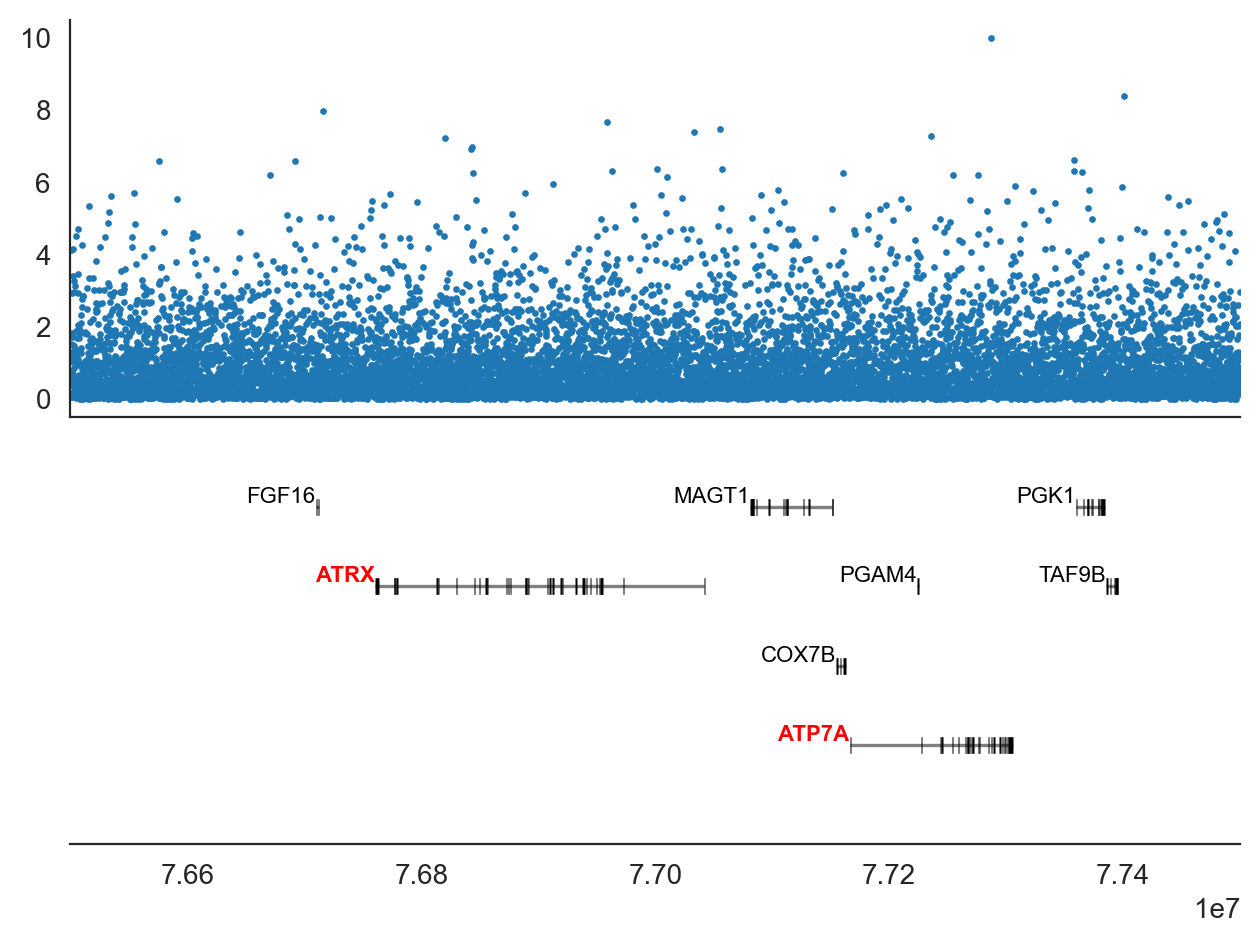

In [21]:
ax = gi.gene_plot('chrX', 76500000, 77500000, 'hg19', highlight=['ATRX', 'ATP7A'])
ax.scatter(x, y, s=2)
sns.despine(ax=ax) # make it look nicer
plt.tight_layout()

**Combinatorial hightlighting:**

Combining text weight, style, color and bbox:

In [22]:
highlight = defaultdict(dict)
for gene in ['ATRX', 'COX7B', 'PGK1']:
    highlight[gene].update(dict(weight='bold'))
for gene in ['MAGT1']:
    highlight[gene].update(dict(style='italic'))
for gene in ['ATP7A', 'ATRX']:
    highlight[gene].update(dict(color='red'))
for gene in ['PGK1', 'ATRX']:
    highlight[gene].update(dict(bbox=dict(edgecolor='black', facecolor='none', linewidth=0.2)))


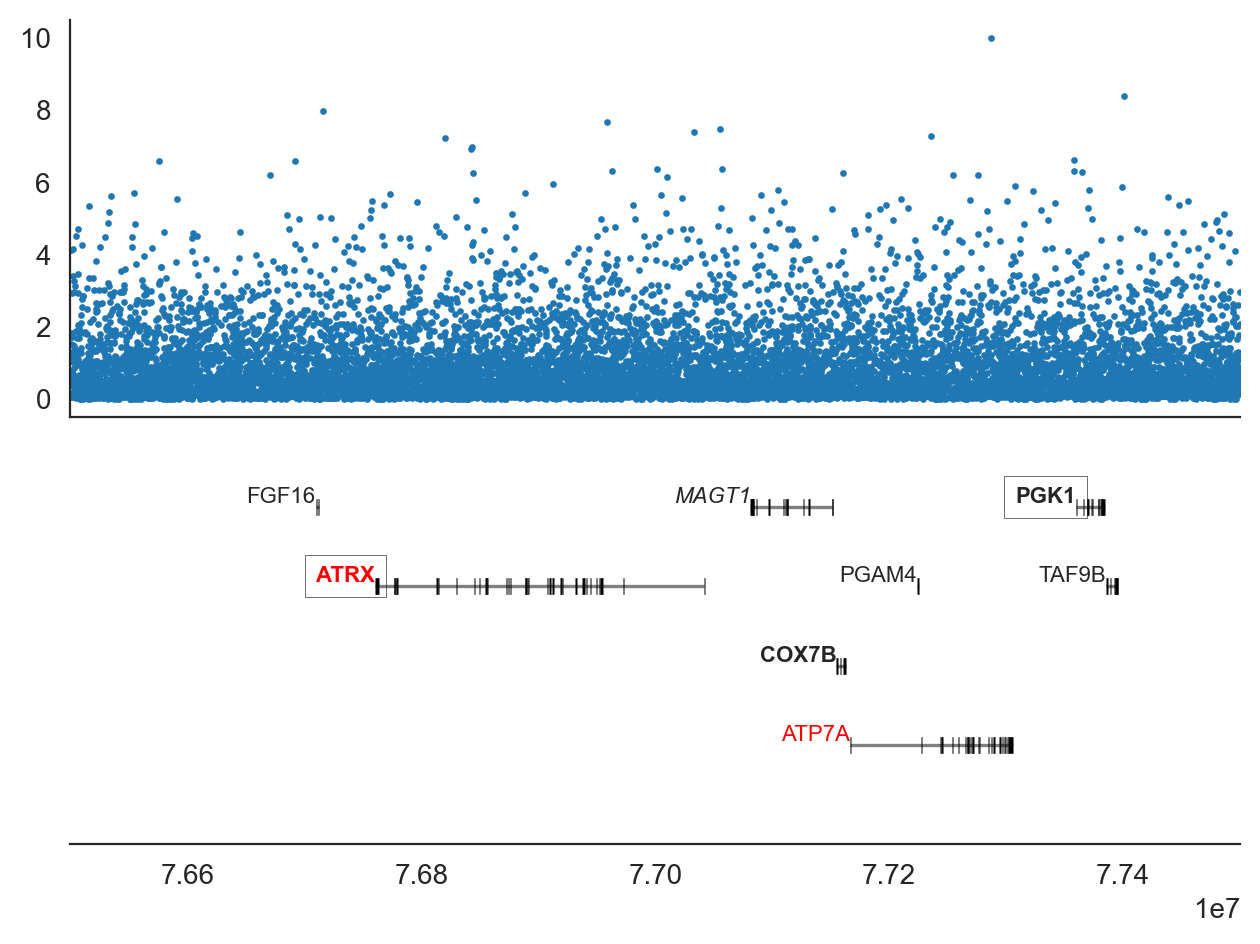

In [23]:
ax = gi.gene_plot('chrX', 76500000, 77500000, 'hg19', highlight=highlight)
ax.scatter(x, y, s=2)
sns.despine(ax=ax) # make it look nicer
plt.tight_layout()

In [24]:
highlight = defaultdict(dict)
for gene in gene_list('xi_any_evidence'):
    highlight[gene].update(dict(weight='bold'))
for gene in gene_list('ech75_regions'):
    highlight[gene].update(dict(style='italic'))
for gene in gene_list('sfari_all_conf') + gene_list('intelect_disabil'):
    highlight[gene].update(dict(color='red'))
for gene in gene_list('gametologs') +  gene_list('mult_copy') + gene_list('xi_escape') + gene_list('cDEG') + gene_list('nDEG'):
    highlight[gene].update(dict(bbox=dict(edgecolor='black', facecolor='none', linewidth=0.2)))

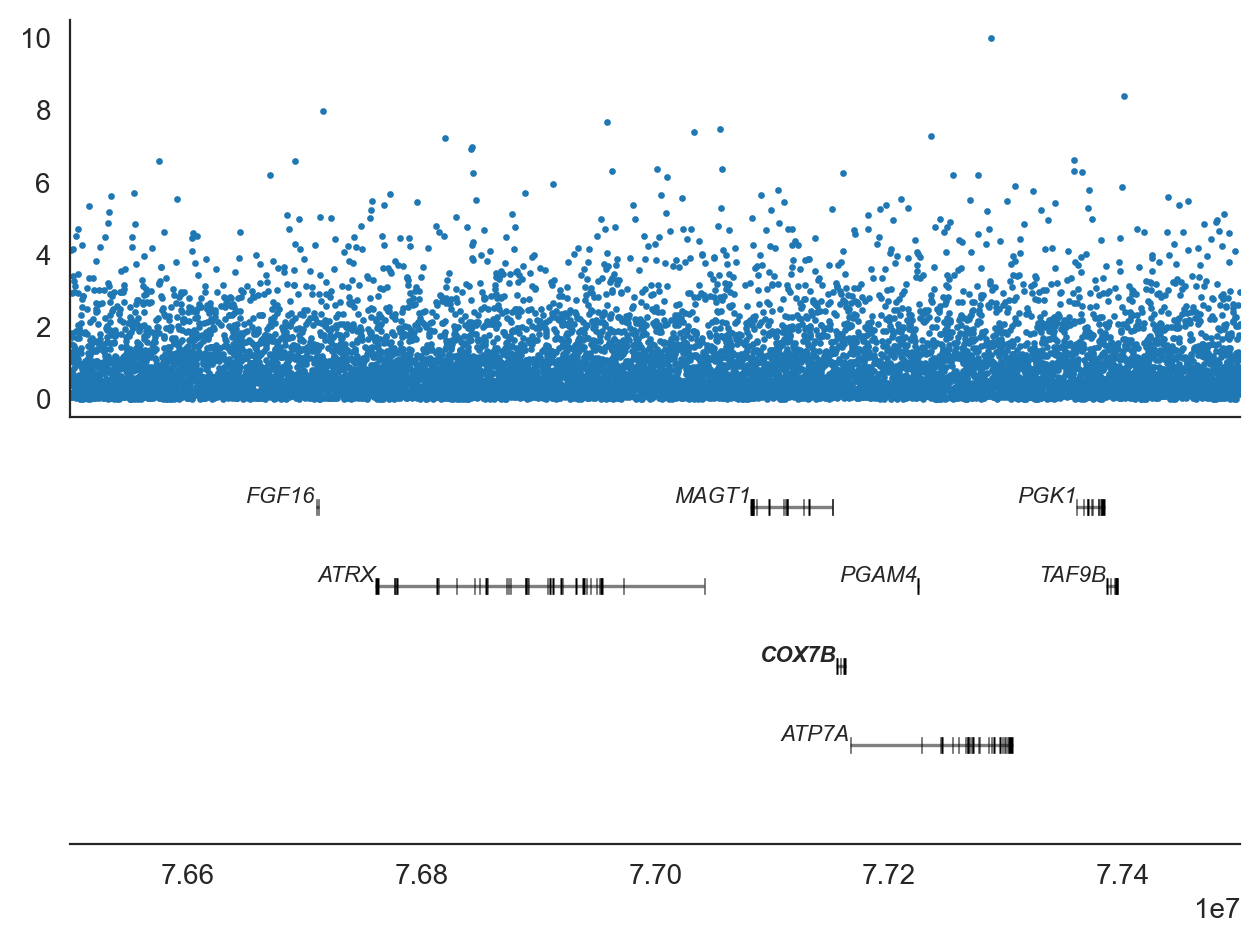

In [25]:
ax = gi.gene_plot('chrX', 76500000, 77500000, 'hg19', highlight=highlight)

ax.scatter(x, y, s=2)
sns.despine(ax=ax) # make it look nicer
plt.tight_layout()

**Larger with colors:**

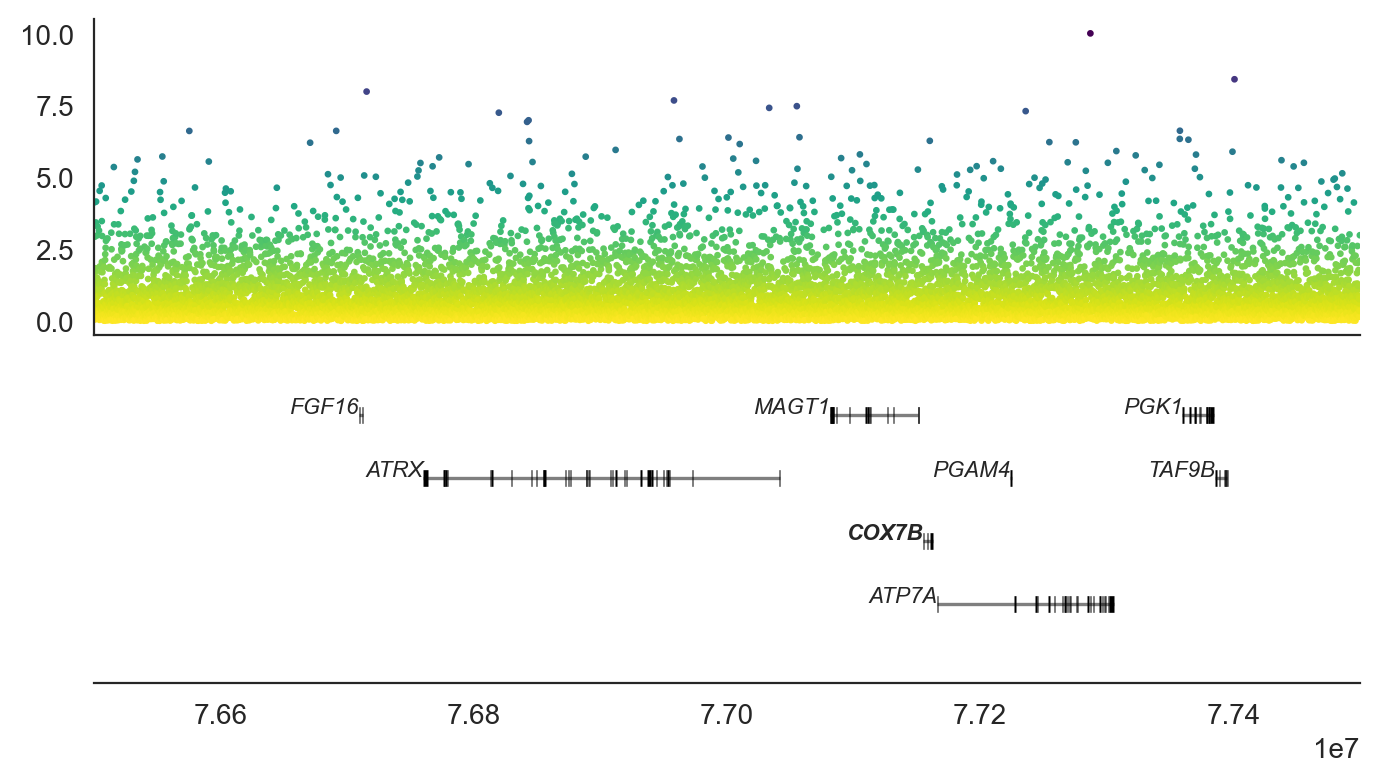

In [26]:
ax = gi.gene_plot('chrX', 76500000, 77500000, 'hg19', highlight=highlight, figsize=(7, 4))

ax.scatter(x, y, s=2, c=y, cmap='viridis_r')
sns.despine(ax=ax) # make it look nicer
plt.tight_layout()

**Other features:**

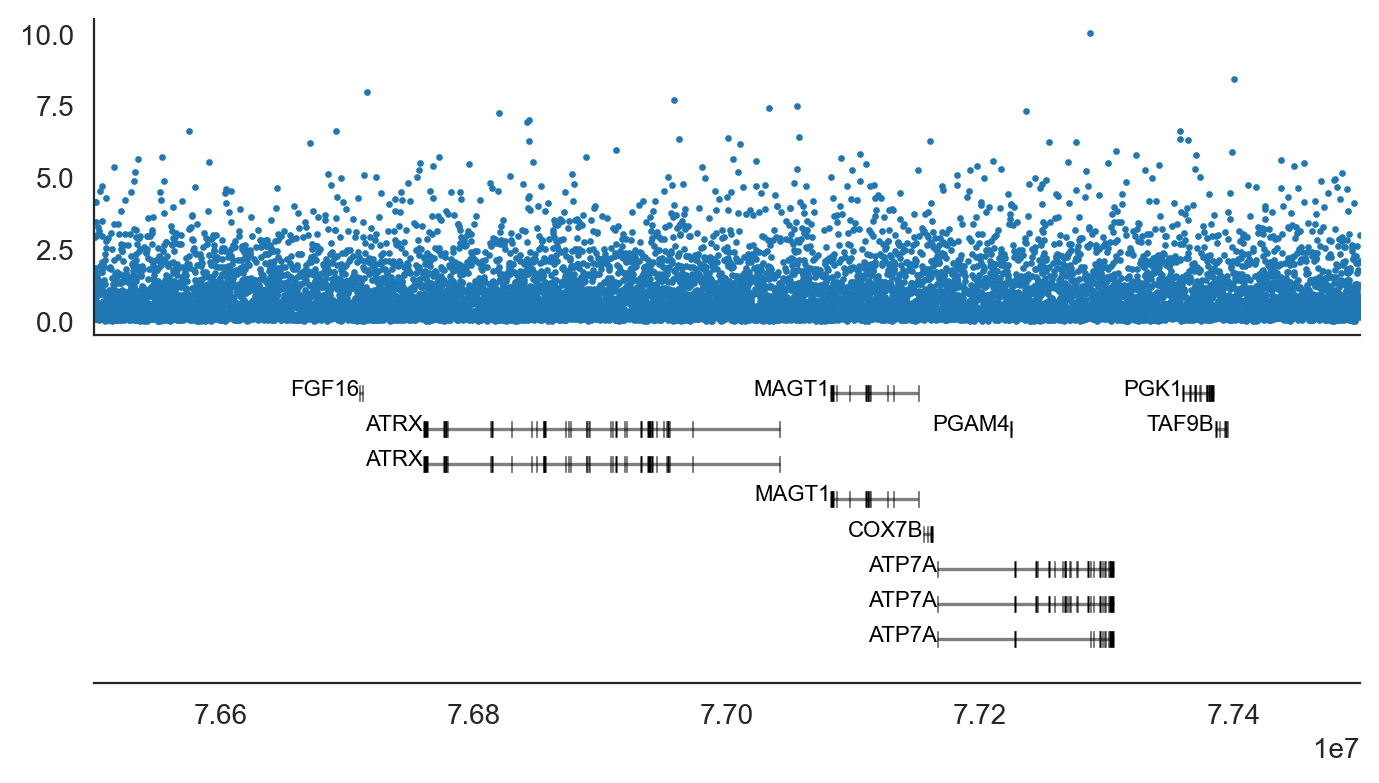

In [27]:
ax = gi.gene_plot('chrX', 76500000, 77500000, assembly='hg19',
                  figsize=(7, 4),          # larger figure
                  collapse_splice_var=False, # show all splice variants separately
                  exact_exons=False,        # allow exons to be wide enough to be visible on large plots
                  hard_limits=True,          # truncate genes that overlap the borders of the specified range
                 )

ax.scatter(x, y, s=2)
sns.despine(ax=ax) # make it look nicer
plt.tight_layout()